In [38]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
import matplotlib.pyplot as plt

In [39]:
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position



In [40]:
AAPL = pd.read_csv("/Users/fahad/project_repo/data/final/Moving_Average_Preparation/AAPL_MA_prep.csv", index_col=0)


In [41]:
AAPL.columns = ['Date', 'Open','High','Low','Close','Volume']

In [42]:
AAPL.Date = pd.to_datetime(AAPL.Date, format="%Y-%m-%d")

In [43]:
AAPL = AAPL.set_index(AAPL['Date'])

In [44]:
AAPL = AAPL.drop("Date", axis=1)


In [45]:
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-10,201.85,203.72,201.5900,203.1732,11887612
2019-07-09,199.20,201.51,198.8100,201.2400,20366719
2019-07-08,200.81,201.40,198.4100,200.0200,25338628
2019-07-05,203.35,205.08,202.9000,204.2300,17265518
2019-07-03,203.28,204.44,202.6901,204.4100,11362045


In [46]:
plt.style.use('ggplot')

/Users/fahad/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


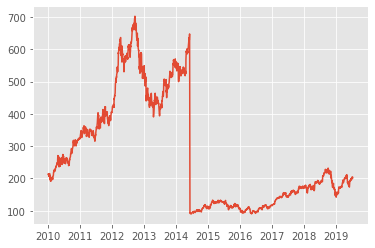

In [47]:

plt.plot(AAPL.index,AAPL.Close)

In [48]:
#dictionary to store equity
equity_dict = dict()

In [49]:
class SmaCrossTrailing(TrailingStrategy):
            
    n1 = 50
    n2 = 200
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.set_trailing_sl(4)
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if crossover(self.sma1, self.sma2):
            
            #print (position.is_long)
                        
            
            self.buy()
        else:
            pass
#         elif crossover(self.sma2, self.sma1):
            
#             self.sell()
                        
        

            
#     def next(self):
#         #super().next()
#                 # If sma1 crosses above sma2, buy the asset
#         if crossover(self.sma1, self.sma2):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.buy()

#         # Else, if sma1 crosses below sma2, sell it
#         elif crossover(self.sma2, self.sma1):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.sell()
            

        
        

In [50]:
bt = Backtest(AAPL, SmaCrossTrailing, cash=10000, commission=.005)

bt.run()

/Users/fahad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Data index is not sorted in ascending order. Sorting.
  """Entry point for launching an IPython kernel.


Start                     2010-01-04 00:00:00
End                       2019-07-10 00:00:00
Duration                   3474 days 00:00:00
Exposure [%]                           59.384
Equity Final [$]                       4243.4
Equity Peak [$]                       13724.1
Return [%]                            -57.566
Buy & Hold Return [%]                 5.06369
Max. Drawdown [%]                    -86.1141
Avg. Drawdown [%]                    -2.65362
Max. Drawdown Duration      123 days 00:00:00
Avg. Drawdown Duration       19 days 00:00:00
# Trades                                    3
Win Rate [%]                          33.3333
Best Trade [%]                        86.7786
Worst Trade [%]                      -73.7657
Avg. Trade [%]                        -1.2819
Max. Trade Duration         974 days 00:00:00
Avg. Trade Duration         688 days 00:00:00
Expectancy [%]                        59.1343
SQN                                  -0.69484
Sharpe Ratio                      

In [51]:
bt.plot()

In [52]:
df = pd.DataFrame.from_dict([equity_dict])

In [53]:
df = df.T

In [54]:
df.columns = ['Equity']

In [55]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/AAPL_Moving_Average_Equity.csv")

In [56]:
df

,Equity
2010-10-19,10000.000000
2010-10-20,10000.000000
2010-10-21,10000.000000
2010-10-22,10000.000000
2010-10-25,10000.000000
2010-10-26,10000.000000
2010-10-27,10000.000000
2010-10-28,10000.000000
2010-10-29,10000.000000
2010-11-01,10000.000000


In [45]:
class SmaCross(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
#         print (self.sma1)
#         print (self.sma2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.sell()